# Triangle Fill (lock2_from_9000) Training Visualization & Scientific Analysis

This notebook parses `train.py` console logs into structured data and produces publication-quality training plots.

Primary focus:
- Metrics vs. update: `mean_rew`, `inside_frac`, `outside_mean`, `collisions_mean`, `speed_mean`
- Action distribution `act_frac` (STOP/LEFT/RIGHT/STRAIGHT)

Note: if you did not `tee` your training output into a file, you can still use this notebook by pasting your terminal output into the `LOG_TEXT` variable.

**Recommended: select the conda env `yihuai` as the notebook kernel** (it already has numpy/pandas/matplotlib).


## 1) Load training logs (file or manual paste)

In [8]:
from pathlib import Path

RUN_DIR = Path("/home/user/Yihuai/Code/VMAS/runs/triangle_fill_lock2_from_9000")
LOG_PATH = RUN_DIR / "train.log"  # If you later run `... | tee train.log`, it will be auto-loaded here.

# Option A: if train.log exists, load from file
# Option B: otherwise use LOG_TEXT (paste terminal output here)
LOG_TEXT = r"""
# Paste your terminal logs here.
# Example (your recent run 9000->9500):
update= 9010 mean_rew=+5.8103 rollout_s=14.16 inside_frac=0.902 outside_mean=0.004 collisions_mean=0.006 cover_error=0.028 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.05, RIGHT 0.13, STRAIGHT 0.75]
update= 9020 mean_rew=+3.6690 rollout_s=14.32 inside_frac=0.691 outside_mean=0.028 collisions_mean=0.004 cover_error=0.036 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.23, RIGHT 0.09, STRAIGHT 0.62]
update= 9030 mean_rew=+6.2676 rollout_s=14.28 inside_frac=0.960 outside_mean=0.002 collisions_mean=0.007 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.05, RIGHT 0.13, STRAIGHT 0.75]
update= 9040 mean_rew=+1.7949 rollout_s=13.89 inside_frac=0.485 outside_mean=0.044 collisions_mean=0.001 cover_error=0.041 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.19, RIGHT 0.06, STRAIGHT 0.73]
update= 9050 mean_rew=+6.2829 rollout_s=14.40 inside_frac=0.959 outside_mean=0.001 collisions_mean=0.007 cover_error=0.027 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.08, LEFT 0.07, RIGHT 0.10, STRAIGHT 0.75]
update= 9060 mean_rew=+3.2406 rollout_s=13.91 inside_frac=0.616 outside_mean=0.025 collisions_mean=0.002 cover_error=0.034 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.04, RIGHT 0.07, STRAIGHT 0.86]
update= 9070 mean_rew=+6.3399 rollout_s=14.19 inside_frac=0.965 outside_mean=0.001 collisions_mean=0.008 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.09, RIGHT 0.08, STRAIGHT 0.76]
update= 9080 mean_rew=+5.2248 rollout_s=14.18 inside_frac=0.833 outside_mean=0.007 collisions_mean=0.004 cover_error=0.029 speed_mean=0.011 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.04, RIGHT 0.10, STRAIGHT 0.82]
update= 9090 mean_rew=+5.3801 rollout_s=14.65 inside_frac=0.868 outside_mean=0.011 collisions_mean=0.007 cover_error=0.032 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.18, RIGHT 0.08, STRAIGHT 0.67]
update= 9100 mean_rew=+6.0523 rollout_s=14.13 inside_frac=0.933 outside_mean=0.002 collisions_mean=0.007 cover_error=0.029 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.04, RIGHT 0.11, STRAIGHT 0.79]
update= 9110 mean_rew=+2.9471 rollout_s=14.17 inside_frac=0.614 outside_mean=0.035 collisions_mean=0.004 cover_error=0.039 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.20, RIGHT 0.06, STRAIGHT 0.71]
update= 9120 mean_rew=+6.3144 rollout_s=14.54 inside_frac=0.964 outside_mean=0.001 collisions_mean=0.008 cover_error=0.029 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.05, RIGHT 0.10, STRAIGHT 0.77]
update= 9130 mean_rew=+2.0746 rollout_s=13.45 inside_frac=0.504 outside_mean=0.039 collisions_mean=0.001 cover_error=0.040 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.12, RIGHT 0.04, STRAIGHT 0.83]
update= 9140 mean_rew=+6.4477 rollout_s=14.22 inside_frac=0.978 outside_mean=0.000 collisions_mean=0.009 cover_error=0.028 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.09, LEFT 0.07, RIGHT 0.08, STRAIGHT 0.77]
update= 9150 mean_rew=+4.1962 rollout_s=13.84 inside_frac=0.713 outside_mean=0.015 collisions_mean=0.003 cover_error=0.031 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.04, RIGHT 0.06, STRAIGHT 0.86]
update= 9160 mean_rew=+6.4920 rollout_s=14.24 inside_frac=0.984 outside_mean=0.000 collisions_mean=0.010 cover_error=0.028 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.09, RIGHT 0.07, STRAIGHT 0.79]
update= 9170 mean_rew=+5.6523 rollout_s=14.11 inside_frac=0.880 outside_mean=0.004 collisions_mean=0.006 cover_error=0.028 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.04, RIGHT 0.11, STRAIGHT 0.81]
update= 9180 mean_rew=+4.4815 rollout_s=14.38 inside_frac=0.776 outside_mean=0.021 collisions_mean=0.007 cover_error=0.035 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.19, RIGHT 0.06, STRAIGHT 0.72]
update= 9190 mean_rew=+6.2427 rollout_s=14.19 inside_frac=0.958 outside_mean=0.001 collisions_mean=0.008 cover_error=0.029 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.04, RIGHT 0.11, STRAIGHT 0.81]
update= 9200 mean_rew=+2.3447 rollout_s=13.92 inside_frac=0.546 outside_mean=0.040 collisions_mean=0.003 cover_error=0.039 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.18, RIGHT 0.05, STRAIGHT 0.76]
update= 9210 mean_rew=+6.4095 rollout_s=14.18 inside_frac=0.977 outside_mean=0.001 collisions_mean=0.009 cover_error=0.029 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.06, RIGHT 0.10, STRAIGHT 0.81]
update= 9220 mean_rew=+2.9498 rollout_s=13.58 inside_frac=0.586 outside_mean=0.028 collisions_mean=0.002 cover_error=0.033 speed_mean=0.014 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.06, RIGHT 0.04, STRAIGHT 0.89]
update= 9230 mean_rew=+6.4738 rollout_s=14.50 inside_frac=0.982 outside_mean=0.000 collisions_mean=0.008 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.08, RIGHT 0.08, STRAIGHT 0.80]
update= 9240 mean_rew=+4.9178 rollout_s=14.09 inside_frac=0.795 outside_mean=0.008 collisions_mean=0.004 cover_error=0.027 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.03, RIGHT 0.08, STRAIGHT 0.86]
update= 9250 mean_rew=+6.5146 rollout_s=15.09 inside_frac=0.986 outside_mean=0.000 collisions_mean=0.009 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.10, RIGHT 0.08, STRAIGHT 0.77]
update= 9260 mean_rew=+5.8208 rollout_s=14.40 inside_frac=0.902 outside_mean=0.002 collisions_mean=0.006 cover_error=0.029 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.04, RIGHT 0.12, STRAIGHT 0.81]
update= 9270 mean_rew=+3.7232 rollout_s=14.36 inside_frac=0.696 outside_mean=0.028 collisions_mean=0.005 cover_error=0.037 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.19, RIGHT 0.05, STRAIGHT 0.73]
update= 9280 mean_rew=+6.0520 rollout_s=14.20 inside_frac=0.935 outside_mean=0.002 collisions_mean=0.009 cover_error=0.031 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.04, RIGHT 0.11, STRAIGHT 0.81]
update= 9290 mean_rew=+1.8826 rollout_s=14.17 inside_frac=0.490 outside_mean=0.042 collisions_mean=0.001 cover_error=0.040 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.17, RIGHT 0.03, STRAIGHT 0.80]
update= 9300 mean_rew=+6.2852 rollout_s=14.49 inside_frac=0.961 outside_mean=0.001 collisions_mean=0.009 cover_error=0.030 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.07, RIGHT 0.09, STRAIGHT 0.79]
update= 9310 mean_rew=+3.7514 rollout_s=13.81 inside_frac=0.667 outside_mean=0.019 collisions_mean=0.002 cover_error=0.030 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.04, RIGHT 0.05, STRAIGHT 0.90]
update= 9320 mean_rew=+6.4045 rollout_s=14.22 inside_frac=0.974 outside_mean=0.001 collisions_mean=0.009 cover_error=0.030 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.07, LEFT 0.08, RIGHT 0.07, STRAIGHT 0.79]
update= 9330 mean_rew=+5.2017 rollout_s=14.05 inside_frac=0.827 outside_mean=0.006 collisions_mean=0.004 cover_error=0.027 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.04, RIGHT 0.08, STRAIGHT 0.83]
update= 9340 mean_rew=+5.2806 rollout_s=14.63 inside_frac=0.853 outside_mean=0.011 collisions_mean=0.006 cover_error=0.032 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.09, LEFT 0.17, RIGHT 0.07, STRAIGHT 0.67]
update= 9350 mean_rew=+5.9930 rollout_s=14.18 inside_frac=0.929 outside_mean=0.001 collisions_mean=0.007 cover_error=0.030 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.08, LEFT 0.04, RIGHT 0.10, STRAIGHT 0.78]
update= 9360 mean_rew=+2.8351 rollout_s=14.08 inside_frac=0.597 outside_mean=0.034 collisions_mean=0.003 cover_error=0.039 speed_mean=0.011 ent_coef=0.0005 act_frac=[STOP 0.04, LEFT 0.18, RIGHT 0.05, STRAIGHT 0.73]
update= 9370 mean_rew=+6.3033 rollout_s=14.10 inside_frac=0.964 outside_mean=0.001 collisions_mean=0.009 cover_error=0.030 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.05, RIGHT 0.09, STRAIGHT 0.80]
update= 9380 mean_rew=+2.3049 rollout_s=13.24 inside_frac=0.525 outside_mean=0.036 collisions_mean=0.001 cover_error=0.036 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.11, RIGHT 0.03, STRAIGHT 0.85]
update= 9390 mean_rew=+6.4360 rollout_s=14.12 inside_frac=0.978 outside_mean=0.000 collisions_mean=0.009 cover_error=0.029 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.07, RIGHT 0.08, STRAIGHT 0.79]
update= 9400 mean_rew=+4.5658 rollout_s=14.08 inside_frac=0.756 outside_mean=0.011 collisions_mean=0.003 cover_error=0.027 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.04, RIGHT 0.06, STRAIGHT 0.87]
update= 9410 mean_rew=+6.4530 rollout_s=14.15 inside_frac=0.978 outside_mean=0.000 collisions_mean=0.008 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.10, RIGHT 0.09, STRAIGHT 0.75]
update= 9420 mean_rew=+5.8808 rollout_s=14.08 inside_frac=0.910 outside_mean=0.002 collisions_mean=0.006 cover_error=0.027 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.05, RIGHT 0.10, STRAIGHT 0.82]
update= 9430 mean_rew=+4.3803 rollout_s=14.30 inside_frac=0.766 outside_mean=0.022 collisions_mean=0.005 cover_error=0.036 speed_mean=0.010 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.21, RIGHT 0.08, STRAIGHT 0.66]
update= 9440 mean_rew=+6.3778 rollout_s=14.19 inside_frac=0.973 outside_mean=0.000 collisions_mean=0.009 cover_error=0.028 speed_mean=0.009 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.06, RIGHT 0.10, STRAIGHT 0.79]
update= 9450 mean_rew=+2.4398 rollout_s=13.90 inside_frac=0.555 outside_mean=0.038 collisions_mean=0.002 cover_error=0.039 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.02, LEFT 0.17, RIGHT 0.04, STRAIGHT 0.76]
update= 9460 mean_rew=+6.5322 rollout_s=14.48 inside_frac=0.988 outside_mean=0.000 collisions_mean=0.010 cover_error=0.029 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.07, RIGHT 0.09, STRAIGHT 0.78]
update= 9470 mean_rew=+2.9313 rollout_s=13.84 inside_frac=0.586 outside_mean=0.029 collisions_mean=0.002 cover_error=0.035 speed_mean=0.013 ent_coef=0.0005 act_frac=[STOP 0.01, LEFT 0.06, RIGHT 0.04, STRAIGHT 0.89]
update= 9480 mean_rew=+6.5651 rollout_s=14.13 inside_frac=0.989 outside_mean=0.000 collisions_mean=0.010 cover_error=0.028 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.05, LEFT 0.09, RIGHT 0.08, STRAIGHT 0.78]
update= 9490 mean_rew=+5.0502 rollout_s=14.32 inside_frac=0.811 outside_mean=0.008 collisions_mean=0.004 cover_error=0.027 speed_mean=0.012 ent_coef=0.0005 act_frac=[STOP 0.03, LEFT 0.05, RIGHT 0.08, STRAIGHT 0.84]
update= 9500 mean_rew=+6.5242 rollout_s=15.00 inside_frac=0.985 outside_mean=0.000 collisions_mean=0.010 cover_error=0.028 speed_mean=0.008 ent_coef=0.0005 act_frac=[STOP 0.06, LEFT 0.10, RIGHT 0.08, STRAIGHT 0.77]
"""

if LOG_PATH.exists():
    log_text = LOG_PATH.read_text(encoding="utf-8", errors="ignore")
    print(f"Loaded log file: {LOG_PATH}  (chars={len(log_text)})")
else:
    log_text = LOG_TEXT
    print("No train.log found; using LOG_TEXT (paste your terminal output here for full plots).")

print("RUN_DIR:", RUN_DIR)
print("lines:", len(log_text.splitlines()))


No train.log found; using LOG_TEXT (paste your terminal output here for full plots).
RUN_DIR: /home/user/Yihuai/Code/VMAS/runs/triangle_fill_lock2_from_9000
lines: 53


## 2) Parse `update=...` lines into a DataFrame

In [9]:
import re
import pandas as pd

LINE_RE = re.compile(
    r"update=\s*(?P<update>\d+)\s+"
    r"mean_rew=(?P<mean_rew>[+\-]?\d+\.\d+)\s+"
    r"rollout_s=(?P<rollout_s>\d+\.\d+)\s+"
    r"inside_frac=(?P<inside_frac>\d+\.\d+)\s+"
    r"outside_mean=(?P<outside_mean>\d+\.\d+)\s+"
    r"collisions_mean=(?P<collisions_mean>\d+\.\d+)\s+"
    r"cover_error=(?P<cover_error>\d+\.\d+)\s+"
    r"speed_mean=(?P<speed_mean>\d+\.\d+)\s+"
    r"ent_coef=(?P<ent_coef>\d+\.\d+)\s+"
    r"act_frac=\[STOP\s+(?P<act_stop>\d+\.\d+),\s+LEFT\s+(?P<act_left>\d+\.\d+),\s+RIGHT\s+(?P<act_right>\d+\.\d+),\s+STRAIGHT\s+(?P<act_straight>\d+\.\d+)\]"
)

rows = []
for line in log_text.splitlines():
    m = LINE_RE.search(line)
    if not m:
        continue
    d = m.groupdict()
    d["update"] = int(d["update"])
    for k in [
        "mean_rew",
        "rollout_s",
        "inside_frac",
        "outside_mean",
        "collisions_mean",
        "cover_error",
        "speed_mean",
        "ent_coef",
        "act_stop",
        "act_left",
        "act_right",
        "act_straight",
    ]:
        d[k] = float(d[k])
    rows.append(d)

df = pd.DataFrame(rows).sort_values("update").reset_index(drop=True)
display(df.head())
print("parsed points:", len(df))
if len(df) > 0:
    print("update range:", df["update"].min(), "->", df["update"].max())


,update,mean_rew,rollout_s,inside_frac,outside_mean,collisions_mean,cover_error,speed_mean,ent_coef,act_stop,act_left,act_right,act_straight
0,9010,5.8103,14.16,0.902,0.004,0.006,0.028,0.010,0.0005,0.07,0.05,0.13,0.75
1,9020,3.6690,14.32,0.691,0.028,0.004,0.036,0.010,0.0005,0.07,0.23,0.09,0.62
2,9030,6.2676,14.28,0.960,0.002,0.007,0.028,0.009,0.0005,0.07,0.05,0.13,0.75
3,9040,1.7949,13.89,0.485,0.044,0.001,0.041,0.012,0.0005,0.02,0.19,0.06,0.73
4,9050,6.2829,14.40,0.959,0.001,0.007,0.027,0.009,0.0005,0.08,0.07,0.10,0.75


parsed points: 50
update range: 9010 -> 9500


## 3) Training curves (with moving average)

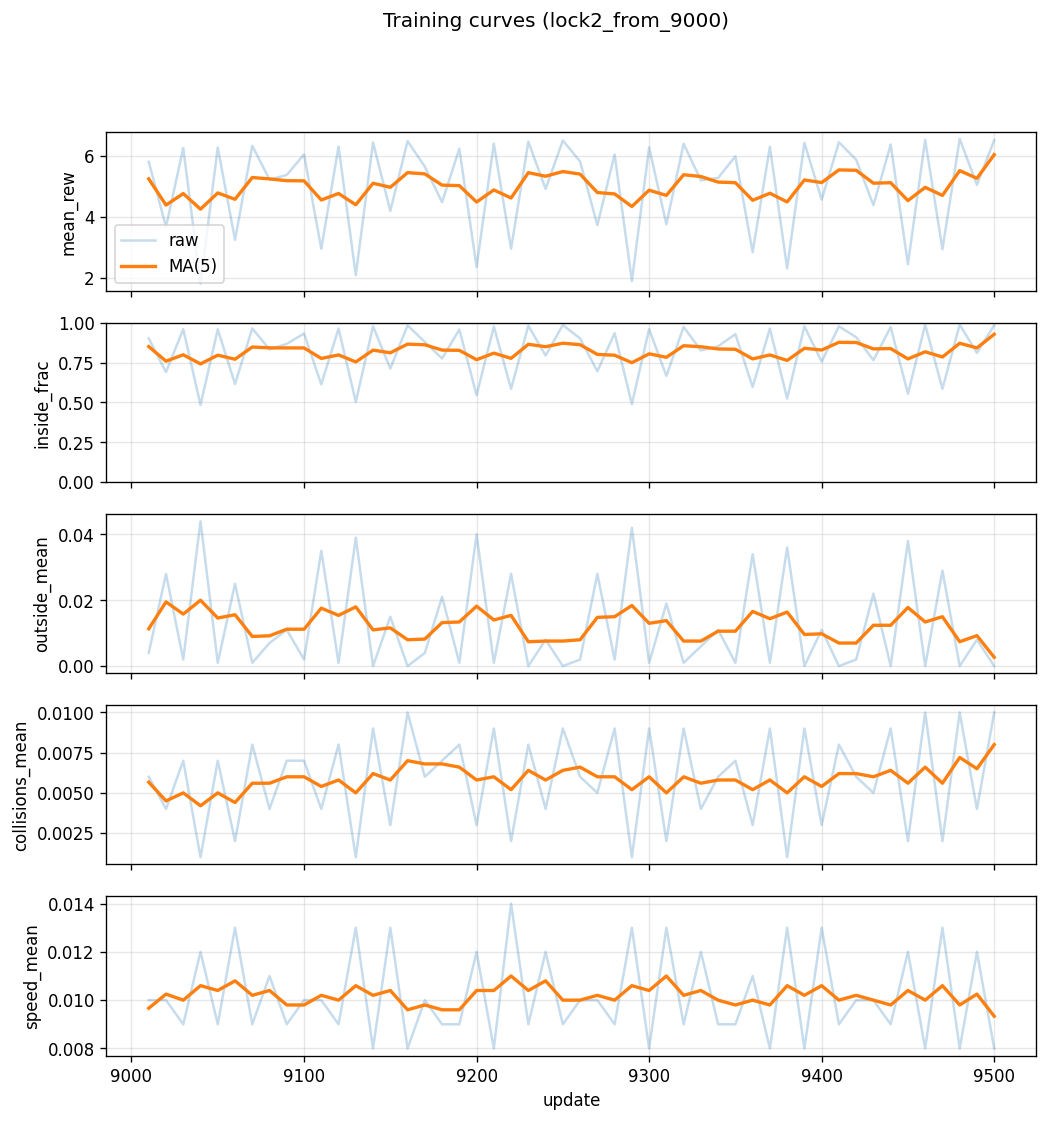

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "figure.dpi": 120,
    "savefig.dpi": 120,
    "axes.grid": True,
    "grid.alpha": 0.3,
})

if len(df) == 0:
    raise RuntimeError("No training log lines parsed. Paste your logs into LOG_TEXT or create train.log.")

window = 5  # Increase this (e.g., 11/21) for smoother curves
df_s = df.copy()
for col in ["mean_rew", "inside_frac", "outside_mean", "collisions_mean", "cover_error", "speed_mean"]:
    df_s[col + "_ma"] = df_s[col].rolling(window=window, center=True, min_periods=1).mean()

fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

axs[0].plot(df_s["update"], df_s["mean_rew"], alpha=0.25, label="raw")
axs[0].plot(df_s["update"], df_s["mean_rew_ma"], lw=2, label=f"MA({window})")
axs[0].set_ylabel("mean_rew")
axs[0].legend(loc="best")

axs[1].plot(df_s["update"], df_s["inside_frac"], alpha=0.25)
axs[1].plot(df_s["update"], df_s["inside_frac_ma"], lw=2)
axs[1].set_ylabel("inside_frac")
axs[1].set_ylim(0, 1)

axs[2].plot(df_s["update"], df_s["outside_mean"], alpha=0.25)
axs[2].plot(df_s["update"], df_s["outside_mean_ma"], lw=2)
axs[2].set_ylabel("outside_mean")

axs[3].plot(df_s["update"], df_s["collisions_mean"], alpha=0.25)
axs[3].plot(df_s["update"], df_s["collisions_mean_ma"], lw=2)
axs[3].set_ylabel("collisions_mean")

axs[4].plot(df_s["update"], df_s["speed_mean"], alpha=0.25)
axs[4].plot(df_s["update"], df_s["speed_mean_ma"], lw=2)
axs[4].set_ylabel("speed_mean")
axs[4].set_xlabel("update")

fig.suptitle("Training curves (lock2_from_9000)")
plt.show()


## 4) Action distribution (act_frac)

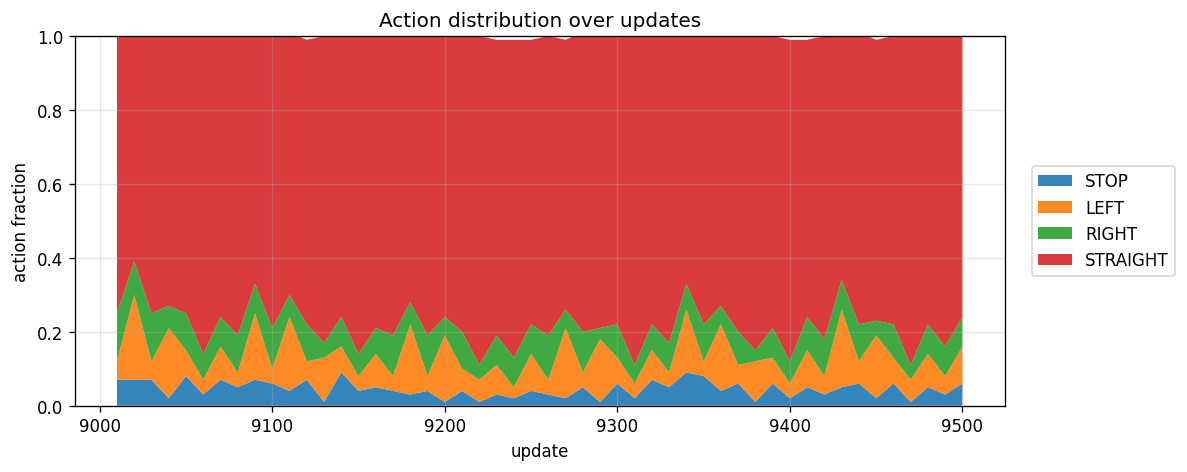

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

x = df_s["update"].to_numpy()
stop = df_s["act_stop"].to_numpy()
left = df_s["act_left"].to_numpy()
right = df_s["act_right"].to_numpy()
straight = df_s["act_straight"].to_numpy()

ax.stackplot(
    x,
    stop,
    left,
    right,
    straight,
    labels=["STOP", "LEFT", "RIGHT", "STRAIGHT"],
    alpha=0.9,
)

ax.set_ylim(0, 1)
ax.set_xlabel("update")
ax.set_ylabel("action fraction")
ax.set_title("Action distribution over updates")
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.show()


## 5) Quick check: high-score vs low-score segments ("inside" vs "traveling")

In [12]:
def summarize_slice(name: str, sub: pd.DataFrame) -> None:
    if len(sub) == 0:
        print(f"[{name}] empty")
        return
    cols = ["inside_frac", "outside_mean", "collisions_mean", "speed_mean", "mean_rew", "act_stop", "act_straight"]
    print(f"[{name}] n={len(sub)}")
    display(sub[cols].describe().loc[["mean", "std", "min", "max"]])

hi = df[df["inside_frac"] >= 0.90]
lo = df[df["inside_frac"] <= 0.60]
summarize_slice("inside_frac >= 0.90", hi)
summarize_slice("inside_frac <= 0.60", lo)

print("\nInterpretation tip:")
print("- If the low-score segment has larger outside_mean, smaller collisions_mean, and larger speed_mean, it is usually more like 'traveling outside' than 'being pushed out'.")


[inside_frac >= 0.90] n=25


,inside_frac,outside_mean,collisions_mean,speed_mean,mean_rew,act_stop,act_straight
mean,0.960560,0.000920,0.008280,0.008800,6.291024,0.057200,0.783200
std,0.026779,0.000997,0.001275,0.000707,0.227961,0.016207,0.021158
min,0.902000,0.000000,0.006000,0.008000,5.810300,0.030000,0.750000
max,0.989000,0.004000,0.010000,0.010000,6.565100,0.090000,0.820000


[inside_frac <= 0.60] n=9


,inside_frac,outside_mean,collisions_mean,speed_mean,mean_rew,act_stop,act_straight
mean,0.541556,0.036667,0.001778,0.012556,2.395300,0.015556,0.804444
std,0.042963,0.005500,0.000833,0.000882,0.436906,0.010138,0.063661
min,0.485000,0.028000,0.001000,0.011000,1.794900,0.010000,0.730000
max,0.597000,0.044000,0.003000,0.014000,2.949800,0.040000,0.890000



Interpretation tip:
- If the low-score segment has larger outside_mean, smaller collisions_mean, and larger speed_mean, it is usually more like 'traveling outside' than 'being pushed out'.


## (Optional) 6) Evaluation sweep: run evaluate.py on checkpoints, plot last/max/gap

This does not depend on training logs and is a more scientific stability evaluation:
- `max` = best performance within an episode
- `last` = final-state performance (staying power)
- `gap = max - last` (smaller means more stable)

Note: this will run multiple evaluations and can take time. Default `RUN_EVAL=False`.


In [13]:
import json
import os
import sys
import subprocess

RUN_EVAL = True  # Set True to actually run evaluate

if RUN_EVAL:
    ckpts = sorted(RUN_DIR.glob("ckpt_*.pt"))
    print("ckpts:", len(ckpts))
    
    def run_eval(ckpt_path: Path, metric_mode: str, episodes: int = 16, num_envs: int = 16) -> dict:
        # Make sure the `VMAS` package is importable when evaluate.py runs in a subprocess.
        # evaluate.py does `from VMAS.scenarios.triangle_fill import Scenario`, so we must have
        # the *parent* of the `VMAS/` directory on PYTHONPATH.
        env = os.environ.copy()
        code_root = "/home/user/Yihuai/Code"
        env["PYTHONPATH"] = code_root + (":" + env["PYTHONPATH"] if env.get("PYTHONPATH") else "")
        env.setdefault("TMPDIR", "/home/user/Yihuai/Code/VMAS/.tmp")
        cmd = [
            sys.executable,
            "/home/user/Yihuai/Code/VMAS/evaluate.py",
            "--ckpt",
            str(ckpt_path),
            "--device",
            "cuda",
            "--episodes",
            str(episodes),
            "--num-envs",
            str(num_envs),
            "--seed",
            "0",
            "--deterministic",
            "--metric-mode",
            metric_mode,
            "--pile-center-y-mm-min",
            "-180",
            "--pile-center-y-mm-max",
            "-120",
            "--pile-halfwidth-mm",
            "150",
            "--max-episode-steps",
            "1000",
        ]
        r = subprocess.run(cmd, capture_output=True, text=True, env=env)
        if r.returncode != 0:
            raise RuntimeError(f"evaluate failed for {ckpt_path}:\nSTDOUT:\n{r.stdout}\nSTDERR:\n{r.stderr}")
        return json.loads(r.stdout)

    eval_rows = []
    for ckpt in ckpts:
        upd = int(ckpt.stem.split("_")[-1])
        last = run_eval(ckpt, metric_mode="last")
        mx = run_eval(ckpt, metric_mode="max")
        eval_rows.append(
            {
                "update": upd,
                "inside_last": last["inside_frac"]["mean"],
                "inside_max": mx["inside_frac"]["mean"],
                "gap": mx["inside_frac"]["mean"] - last["inside_frac"]["mean"],
                "outside_last": last["outside_mean"]["mean"],
                "collisions_last": last["collisions_mean"]["mean"],
                "speed_last": last.get("speed_mean", {}).get("mean", float("nan")),
                "return_last": last["episode_return"]["mean"],
            }
        )
        print("done", upd)

    df_eval = pd.DataFrame(eval_rows).sort_values("update")
    display(df_eval)

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    ax.plot(df_eval["update"], df_eval["inside_last"], marker="o", label="inside(last)")
    ax.plot(df_eval["update"], df_eval["inside_max"], marker="o", label="inside(max)")
    ax.plot(df_eval["update"], df_eval["gap"], marker="o", label="gap=max-last")
    ax.set_xlabel("update")
    ax.set_ylabel("fraction")
    ax.set_ylim(0, 1)
    ax.legend(loc="best")
    ax.set_title("Stability: last vs max")
    plt.show()
else:
    print("RUN_EVAL=False: skip evaluate sweep. Set RUN_EVAL=True if you want this analysis.")


ckpts: 11
done 9050
done 9100
done 9150
done 9200
done 9250
done 9300
done 9350
done 9400
done 9450
done 9500


ValueError: invalid literal for int() with base 10: 'final'